### Gathering Data

In [1]:
import pandas as pd
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import time
from tweepy import errors
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
arc_df = pd.read_csv('twitter_archive_enhanced.csv')

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join('image_prediction.tsv'), mode='wb') as file:
    file.write(response.content)

In [4]:
import pandas as pd

image_df = pd.read_csv('image_prediction.tsv', sep='\t')

In [5]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
image_df.shape

(2075, 12)

In [7]:
consumer_key = 'GgnjijgUNjq4Zk6qs7fOiEYgw'
consumer_secret = 'SA78ibPPXOI7dHAC6uRsbVrj6IBPmBsDuZaA7cfD7amaer99uk'
access_token = '709099308969291776-fB87Zs1yAN1bAsiy1mkKWBsGosjgCYX'
access_secret = 'j8Asqh72tCSP8WKIKwnx7xXs0IyQUsTowMM95J9L9d9it'

In [8]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [9]:
tweet_ids = arc_df['tweet_id']
print(len(tweet_ids))

2356


In [10]:
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Rate limit reached. Sleeping for: 736


Fail
316: 835152434251116546
Success
317: 834931633769889797
Success
318: 834786237630337024
Success
319: 834574053763584002
Success
320: 834477809192075265
Success
321: 834458053273591808
Success
322: 834209720923721728
Success
323: 834167344700198914
Success
324: 834089966724603904
Success
325: 834086379323871233
Success
326: 833863086058651648
Success
327: 833826103416520705
Success
328: 833732339549220864
Success
329: 833722901757046785
Success
330: 833479644947025920
Success
331: 833124694597443584
Success
332: 832998151111966721
Success
333: 832769181346996225
Success
334: 832757312314028032
Success
335: 832682457690300417
Success
336: 832645525019123713
Success
337: 832636094638288896
Success
338: 832397543355072512
Success
339: 832369877331693569
Success
340: 832273440279240704
Success
341: 832215909146226688
Success
342: 832215726631055365
Success
343: 832088576586297345
Success
344: 832040443403784192
Success
345: 832032802820481025
Success
346: 831939777352105988
Success
347

Rate limit reached. Sleeping for: 786


Fail
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success
551: 804738756058218496
Success
552: 804475857670639616
Success
553: 804413760345620481
Success
554: 804026241225523202
Success
555: 803773340896923648
Success
556: 803692223237865472
Success
557: 803638050916102144
Success
558: 803380650405482500
Success
559: 803321560782307329
Success
560: 803276597545603072
Success
561: 802952499103731712
Success
562: 802624713319034886
Success
563: 802600418706604034
Success
564: 802572683846291456
Success
565: 802323869084381190
Success
566: 802265048156610565
Success
567: 802247111496568832
Fail
568: 802239329049477120
Success
569: 802185808107208704
Success
570: 801958328846974976
Success
571: 8

Rate limit reached. Sleeping for: 788


Fail
760: 778396591732486144
Fail
761: 778383385161035776
Success
762: 778286810187399168
Fail
763: 778039087836069888
Fail
764: 778027034220126208
Success
765: 777953400541634568
Success
766: 777885040357281792
Fail
767: 777684233540206592
Success
768: 777641927919427584
Fail
769: 777621514455814149
Fail
770: 777189768882946048
Success
771: 776819012571455488
Success
772: 776813020089548800
Fail
773: 776477788987613185
Success
774: 776249906839351296
Fail
775: 776218204058357768
Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Fail
779: 775898661951791106
Fail
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792:

Rate limit reached. Sleeping for: 700


Success
945: 752682090207055872
Success
946: 752660715232722944
Success
947: 752568224206688256
Success
948: 752519690950500352
Success
949: 752334515931054080
Success
950: 752309394570878976
Success
951: 752173152931807232
Success
952: 751950017322246144
Success
953: 751937170840121344
Fail
954: 751830394383790080
Success
955: 751793661361422336
Success
956: 751598357617971201
Success
957: 751583847268179968
Fail
958: 751538714308972544
Success
959: 751456908746354688
Fail
960: 751251247299190784
Fail
961: 751205363882532864
Success
962: 751132876104687617
Success
963: 750868782890057730
Success
964: 750719632563142656
Success
965: 750506206503038976
Fail
966: 750429297815552001
Success
967: 750383411068534784
Success
968: 750381685133418496
Success
969: 750147208377409536
Success
970: 750132105863102464
Success
971: 750117059602808832
Success
972: 750101899009982464
Fail
973: 750086836815486976
Fail
974: 750071704093859840
Fail
975: 750056684286914561


Rate limit reached. Sleeping for: 718


Success
976: 750041628174217216
Success
977: 750026558547456000
Fail
978: 750011400160841729
Success
979: 749996283729883136
Success
980: 749981277374128128
Success
981: 749774190421639168
Success
982: 749417653287129088
Success
983: 749403093750648834
Success
984: 749395845976588288
Success
985: 749317047558017024
Success
986: 749075273010798592
Success
987: 749064354620928000
Success
988: 749036806121881602
Fail
989: 748977405889503236
Success
990: 748932637671223296
Success
991: 748705597323898880
Success
992: 748699167502000129
Success
993: 748692773788876800
Fail
994: 748575535303884801
Success
995: 748568946752774144
Success
996: 748346686624440324
Fail
997: 748337862848962560
Success
998: 748324050481647620
Success
999: 748307329658011649
Fail
1000: 748220828303695873
Success
1001: 747963614829678593
Fail
1002: 747933425676525569
Success
1003: 747885874273214464
Success
1004: 747844099428986880
Success
1005: 747816857231626240
Success
1006: 747651430853525504
Success
1007: 74764

Success
1228: 713909862279876608
Success
1229: 713900603437621249
Success
1230: 713761197720473600
Success
1231: 713411074226274305
Success
1232: 713177543487135744
Success
1233: 713175907180089344
Success
1234: 712809025985978368
Success
1235: 712717840512598017
Success
1236: 712668654853337088
Success
1237: 712438159032893441
Success
1238: 712309440758808576
Success
1239: 712097430750289920
Success
1240: 712092745624633345
Success
1241: 712085617388212225
Success
1242: 712065007010385924
Success
1243: 711998809858043904
Success
1244: 711968124745228288
Success
1245: 711743778164514816
Success
1246: 711732680602345472
Success
1247: 711694788429553666
Success
1248: 711652651650457602
Success
1249: 711363825979756544
Success
1250: 711306686208872448
Success
1251: 711008018775851008
Success
1252: 710997087345876993
Success
1253: 710844581445812225
Success
1254: 710833117892898816
Success
1255: 710658690886586372
Success
1256: 710609963652087808
Success
1257: 710588934686908417
Success
12

Success
1478: 693622659251335168
Success
1479: 693590843962331137
Success
1480: 693582294167244802
Success
1481: 693486665285931008
Success
1482: 693280720173801472
Success
1483: 693267061318012928
Success
1484: 693262851218264065
Success
1485: 693231807727280129
Success
1486: 693155686491000832
Success
1487: 693109034023534592
Success
1488: 693095443459342336
Success
1489: 692919143163629568
Success
1490: 692905862751522816
Success
1491: 692901601640583168
Success
1492: 692894228850999298
Success
1493: 692828166163931137
Success
1494: 692752401762250755
Success
1495: 692568918515392513
Success
1496: 692535307825213440
Success
1497: 692530551048294401
Success
1498: 692423280028966913
Success
1499: 692417313023332352
Success
1500: 692187005137076224
Success
1501: 692158366030913536
Success
1502: 692142790915014657
Success
1503: 692041934689402880
Success
1504: 692017291282812928
Success
1505: 691820333922455552
Success
1506: 691793053716221953
Success
1507: 691756958957883396
Success
15

Success
1727: 680055455951884288
Fail
1728: 679877062409191424
Success
1729: 679872969355714560
Success
1730: 679862121895714818
Success
1731: 679854723806179328
Success
1732: 679844490799091713
Success
1733: 679828447187857408
Success
1734: 679777920601223168
Success
1735: 679736210798047232
Success
1736: 679729593985699840
Success
1737: 679722016581222400
Success
1738: 679530280114372609
Success
1739: 679527802031484928
Success
1740: 679511351870550016
Success
1741: 679503373272485890
Success
1742: 679475951516934144
Success
1743: 679462823135686656
Success
1744: 679405845277462528
Success
1745: 679158373988876288
Success
1746: 679148763231985668
Success
1747: 679132435750195208
Success
1748: 679111216690831360
Success
1749: 679062614270468097
Success
1750: 679047485189439488
Success
1751: 679001094530465792
Success
1752: 678991772295516161
Success
1753: 678969228704284672
Success
1754: 678800283649069056
Success
1755: 678798276842360832
Success
1756: 678774928607469569
Success
1757:

Success
1976: 672997845381865473
Success
1977: 672995267319328768
Success
1978: 672988786805112832
Success
1979: 672984142909456390
Success
1980: 672980819271634944
Success
1981: 672975131468300288
Success
1982: 672970152493887488
Success
1983: 672968025906282496
Success
1984: 672964561327235073
Success
1985: 672902681409806336
Success
1986: 672898206762672129
Success
1987: 672884426393653248
Success
1988: 672877615439593473
Success
1989: 672834301050937345
Success
1990: 672828477930868736
Success
1991: 672640509974827008
Success
1992: 672622327801233409
Success
1993: 672614745925664768
Success
1994: 672609152938721280
Success
1995: 672604026190569472
Success
1996: 672594978741354496
Success
1997: 672591762242805761
Success
1998: 672591271085670400
Success
1999: 672538107540070400
Success
2000: 672523490734551040
Success
2001: 672488522314567680
Success
2002: 672482722825261057
Success
2003: 672481316919734272
Success
2004: 672475084225949696
Success
2005: 672466075045466113
Success
20

Success
2225: 668291999406125056
Success
2226: 668286279830867968
Success
2227: 668274247790391296
Success
2228: 668268907921326080
Success
2229: 668256321989451776
Success
2230: 668248472370458624
Success
2231: 668237644992782336
Success
2232: 668226093875376128
Success
2233: 668221241640230912
Success
2234: 668204964695683073
Success
2235: 668190681446379520
Success
2236: 668171859951755264
Success
2237: 668154635664932864
Success
2238: 668142349051129856
Success
2239: 668113020489474048
Success
2240: 667937095915278337
Success
2241: 667924896115245057
Success
2242: 667915453470232577
Success
2243: 667911425562669056
Success
2244: 667902449697558528
Success
2245: 667886921285246976
Success
2246: 667885044254572545
Success
2247: 667878741721415682
Success
2248: 667873844930215936
Success
2249: 667866724293877760
Success
2250: 667861340749471744
Success
2251: 667832474953625600
Success
2252: 667806454573760512
Success
2253: 667801013445750784
Success
2254: 667793409583771648
Success
22

Rate limit reached. Sleeping for: 350


Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
2329: 666396247373291520
Success
2330: 666373753744588802
Success
2331: 666362758909284353
Success
2332: 666353288456101888
Success
2333: 666345417576210432
Success
2334: 666337882303524864
Success
2335: 666293911632134144
Success
23

In [11]:
# List of dictionaries to read tweet's JSON data line by line and later convert to a DataFrame
df_list = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        # Append to list of dictionaries
        df_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count'],
                       })

# Create a DataFrame with tweet ID, retweet count, favorite count and display_text_range
tweet_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [12]:
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7006,33807
1,892177421306343426,5301,29328
2,891815181378084864,3479,22047
3,891689557279858688,7225,36934
4,891327558926688256,7758,35308


## Assessing Data

In [13]:
arc_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1393,700029284593901568,NaN,NaN,2016-02-17 18:49:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coops. His ship is taking on water. So...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700029284...,10,10,Coops,None,None,None,None
1861,675483430902214656,NaN,NaN,2015-12-12 01:12:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Rare shielded battle dog here. Very happy abou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675483430...,5,10,None,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
1913,674372068062928900,NaN,NaN,2015-12-08 23:36:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Chesney. On the outside he stays calm &am...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674372068...,10,10,Chesney,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None


In [14]:
arc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
# checking for the unique dog names
arc_df['name'].value_counts().head(60).sort_index()

Alfie         5
Bailey        7
Bella         6
Bentley       5
Bo            9
Buddy         7
Carl          4
Charlie      12
Chester       5
Clarence      4
Clark         4
Cooper       11
Daisy         7
Dave          6
Dexter        4
Duke          4
Finn          5
George        5
Gus           5
Hank          4
Jack          6
Jax           6
Jerry         4
Koda          6
Larry         5
Leo           6
Loki          4
Lola         10
Louis         5
Lucy         11
Luna          4
Maddie        4
Maggie        4
Milo          6
None        745
Oakley        5
Oliver       11
Oscar         6
Penny        10
Phil          5
Reggie        4
Reginald      4
Riley         4
Ruby          4
Rusty         6
Sadie         8
Sammy         5
Scooter       4
Scout         6
Stanley       6
Sunny         5
Toby          7
Tucker       10
Walter        4
Winston       9
a            55
an            7
quite         4
the           8
very          5
Name: name, dtype: int64

In [16]:
#check for retweeted data
print(len(arc_df[arc_df['retweeted_status_id'].isnull() == False ]))

181


In [17]:
#sorting the rating_numerator values
arc_df['rating_numerator'].value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [18]:
#sorting the rating_denominator values
arc_df['rating_denominator'].value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [19]:
arc_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [20]:
# Number of records whose both doggo and floofer columns are not None
len(arc_df[(arc_df['doggo'] != 'None') & (arc_df['floofer'] != 'None')])

1

In [21]:
# Number of records whose both doggo and pupper columns are not None
len(arc_df[(arc_df['doggo'] != 'None') & (arc_df['pupper'] != 'None')])

12

In [22]:
# Number of records whose both doggo and puppo columns are not None
len(arc_df[(arc_df['doggo'] != 'None') & (arc_df['puppo'] != 'None')])

1

In [23]:
# Number or records whose bith flooder and pupper columns are not None
len(arc_df[(arc_df['floofer'] != 'None') & (arc_df['pupper'] != 'None')])

0

In [24]:
# Number or records whose bith flooder and puppo columns are not None
len(arc_df[(arc_df['floofer'] != 'None') & (arc_df['puppo'] != 'None')])

0

In [25]:
# Number or records whose bith pupper and puppo columns are not None
len(arc_df[(arc_df['pupper'] != 'None') & (arc_df['puppo'] != 'None')])

0

In [26]:
image_df.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1539,790946055508652032,https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg,1,dishwasher,0.700466,False,golden_retriever,0.245773,True,chow,0.039012,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
1517,787322443945877504,https://pbs.twimg.com/media/Cu0hlfwWYAEdnXO.jpg,1,seat_belt,0.747739,False,golden_retriever,0.105703,True,dingo,0.017257,False
410,673887867907739649,https://pbs.twimg.com/media/CVoha_IU4AAZ7vi.jpg,2,Brabancon_griffon,0.216767,True,Chihuahua,0.190958,True,golden_retriever,0.163288,True
1390,766693177336135680,https://pbs.twimg.com/media/CqPXYLLXEAAU2HC.jpg,1,Doberman,0.948355,True,vizsla,0.015032,True,Rhodesian_ridgeback,0.009631,True
1239,746872823977771008,https://pbs.twimg.com/media/Cl1s1p7WMAA44Vk.jpg,1,Pembroke,0.540201,True,beagle,0.207835,True,Italian_greyhound,0.043565,True
1706,817536400337801217,https://pbs.twimg.com/media/C1h4_MEXUAARxQF.jpg,2,pug,0.971358,True,French_bulldog,0.028518,True,Boston_bull,0.000086,True
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
1532,789628658055020548,https://pbs.twimg.com/media/CvVTEnPXYAAWLyL.jpg,1,chow,0.260702,True,cougar,0.088143,False,Pomeranian,0.079883,True
564,678255464182861824,https://pbs.twimg.com/media/CWmlvxJU4AEAqaN.jpg,1,Chihuahua,0.613819,True,Yorkshire_terrier,0.127931,True,Pomeranian,0.062124,True


In [27]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
tweet_df.sample(15)

,tweet_id,retweet_count,favorite_count
2095,668484198282485761,207,372
1842,673342308415348736,492,1137
1562,681610798867845120,419,1735
89,874680097055178752,3919,24601
995,734912297295085568,472,2550
570,798933969379225600,4161,12428
1918,671536543010570240,344,1037
1351,693647888581312512,522,2483
2151,667443425659232256,489,682
308,833863086058651648,2215,12644


In [29]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2231 entries, 0 to 2230
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2231 non-null   int64
 1   retweet_count   2231 non-null   int64
 2   favorite_count  2231 non-null   int64
dtypes: int64(3)
memory usage: 52.4 KB


### Quality Issues

>### arc_df dataset
 >1. Twitter advises against storing tweet_id as integer
 >
 >
 >2. Duplicates exist since the dataset includes retweets
 >
 >
 >3. The datetime datatypes is string
 >
 >
 >4. Values for rating numeratior are significantly higher than 10. eg. 420, 666, 1776
 >
 >
 >5. rating_denominator has values other than 10. e.g 420, 666, etc
 >
 >
 >6. Strange names such as a, an, the, all, very, quite etc in the names dataset
 >
 >
 >7. Some dogs have more than one stage
 >
 >
 >8. The html tag is not needed in the Source column
>
>### image_df dataset
 >9. Twitter advises against storing tweet_id as integer
>
>### tweet_df dataset
 >10. Twitter advises against storing tweet_id as integer

### Tidiness Issues

>### arc_df dataset
 >1. The dog stages (doggo	floofer	pupper	puppo) should be merged into one columns
 >
 >
 >2. Merge the three dataset into one dataframe

In [30]:
#make copies of original pieces of data
clean_arc_df = arc_df.copy()
clean_image_df = image_df.copy()
clean_tweet_df = tweet_df.copy()

## Cleaning Data

### Quality issues

### Issue #1:  
#### `arc_df`: Twitter advises against storing tweet_id as integer

#### Define:
Change the tweet_id datatype to string

#### Code

In [31]:
#Changing tweet_id datatype to string
clean_arc_df['tweet_id'] = clean_arc_df['tweet_id'].astype(str)

#### Test

In [32]:
type(clean_arc_df['tweet_id'][0])

str

### Issue #2:  
#### `arc_df`: Duplicates exist since the dataset includes retweets

#### Define:
Remove the duplicated retweeted tweet

#### Code

In [33]:
clean_arc_df =  clean_arc_df[clean_arc_df['retweeted_status_id'].isnull()]

#### Test

In [34]:
len(clean_arc_df[clean_arc_df['retweeted_status_id'].isnull() == False])

0

### Issue #3:  
#### `arc_df`: The datetime datatypes is string

#### Define
change the timestamp datatype to datetime using pd.datetime

#### Code

In [35]:
clean_arc_df['timestamp'] = clean_arc_df['timestamp'].str[0:10]
clean_arc_df['timestamp'] = pd.to_datetime(clean_arc_df['timestamp'])

#### Test

In [36]:
type(clean_arc_df['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

### Issue #4:  
#### `arc_df`: Values for rating numeratior are significantly higher than 10. eg. 420, 666, 1776

#### Define
Replace rating_numerator greater than 15 with 15 using .mask()

#### Code

In [37]:
clean_arc_df['rating_numerator'].mask(clean_arc_df['rating_numerator'] > 15, 15, inplace=True)

In [38]:
clean_arc_df['rating_numerator'].value_counts().sort_index

<bound method Series.sort_index of 12    500
10    442
11    426
13    307
9     156
8      98
7      54
14     43
5      36
6      32
15     26
3      19
4      17
2       9
1       8
0       2
Name: rating_numerator, dtype: int64>

#### Test

In [39]:
clean_arc_df[clean_arc_df['rating_numerator'] > 15]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #5:  
#### `arc_df`: rating_denominator has values other than 10. e.g 420, 666, etc

#### Define
Replace values other than 10 with 10

#### Code

In [40]:
# iterate through all those records whose rating_denominator is not 10
for i, row in clean_arc_df[clean_arc_df['rating_denominator'] != 10].iterrows():
    d = row['rating_denominator']
    #Replace value whose value are not 10 with 10
    clean_arc_df['rating_denominator'].replace(d, 10, inplace=True)

#### Test

In [41]:
clean_arc_df['rating_denominator'].value_counts()

10    2175
Name: rating_denominator, dtype: int64

### Issue #6:  
#### `arc_df`: Strange names such as a, an, the, all, very, quite etc in the names dataset

#### Define
Replace strange names such as a, an, very, quite, etc to None

#### Code

In [42]:
# iterate through all those records whose name starts with lower case
for i, row in clean_arc_df[clean_arc_df['name'].str.match('[a-z]+')].iterrows():
    name = row['name']
    # Replace such name with None
    clean_arc_df['name'].replace(name, None, inplace=True)

#### Test

In [43]:
check = []
for i, row in clean_arc_df[clean_arc_df['name'].str.match('[a-z]+')].iterrows():
    check.append(row['name'])

print(check)

[]


### Issue #7:  
#### `arc_df`:  Some dogs have more than one stage

In [44]:
print(len(clean_arc_df[(clean_arc_df['doggo'] != 'None') & (clean_arc_df['floofer'] != 'None')]))
print(len(clean_arc_df[(clean_arc_df['doggo'] != 'None') & (clean_arc_df['pupper'] != 'None')]))
print(len(clean_arc_df[(clean_arc_df['doggo'] != 'None') & (clean_arc_df['puppo'] != 'None')]))

1
10
1


#### Define
One record features both doggo and floofer, while another features both doggo and puppo. Take a manual look at the text for these 2 recordings to determine one dog stage for each of them. Set both of the column values to None for uncertain texts.

According to the dogtionary, the terms doggo and pupper are occasionally used synonymously. Therefore, for these 10 records,we can set the pupper column to None.

#### Code

In [45]:
# iterating through the text of doggo and floofer to see if we can get the stage of the dog
for idx, row in clean_arc_df[(clean_arc_df['doggo'] != 'None') & (clean_arc_df['floofer'] != 'None')].iterrows():
    print(idx)
    print(row['text'])

200
At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk


In [46]:
for idx, row in clean_arc_df[(clean_arc_df['doggo'] != 'None') & (clean_arc_df['puppo'] != 'None')].iterrows():
    print(idx)
    print(row['text']) 

191
Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel


In [47]:
# retrieving the index for doggo and pupper stage records of dogs
for idx, row in clean_arc_df[(clean_arc_df['doggo'] != 'None') & (clean_arc_df['pupper'] != 'None')]. iterrows():
    print(idx)

460
531
565
575
705
733
889
956
1063
1113


In [48]:
#based on the text above tweet id the dog stage for both dogs are not doggo
#doggo should be set to None for both records
clean_arc_df.loc[[191, 200], ['doggo']] = 'None'

In [49]:
#Since doggo and pupper are used synonymously, we can change set the value for pupper to none
clean_arc_df.loc[[460, 531, 565, 575, 705, 733, 889, 956, 1063, 1113], ['pupper']] = 'None'

#### Test

In [50]:
print(len(clean_arc_df[(clean_arc_df['doggo'] != 'None') & (clean_arc_df['floofer'] != 'None')]))
print(len(clean_arc_df[(clean_arc_df['doggo'] != 'None') & (clean_arc_df['pupper'] != 'None')]))
print(len(clean_arc_df[(clean_arc_df['doggo'] != 'None') & (clean_arc_df['puppo'] != 'None')]))

0
0
0


### Issue #8:  
#### `clean_arc_df`:  The html tag is not needed in the Source column

#### Define
Remove all html tag using regex expresion and retain the text between the tags 

#### Code

In [51]:
clean_arc_df['source'] = clean_arc_df['source'].str.replace(r'<(?:a\b[^>]*>|/a>)', '')

C:\Users\amige\AppData\Local\Temp/ipykernel_19104/1126381670.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  clean_arc_df['source'] = clean_arc_df['source'].str.replace(r'<(?:a\b[^>]*>|/a>)', '')


#### Test

In [52]:
clean_arc_df['source'].value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #9:  
#### `clean_img_df`:  Twitter advises against storing tweet_id as integer

#### Define
Change the tweet_id datatype to string

#### Code

In [53]:
clean_image_df['tweet_id'] = clean_image_df['tweet_id'].astype(str)

#### Test

In [54]:
type(clean_arc_df['tweet_id'][0])

str

### Issue #10:  
#### `clean_tweet_df`:  Twitter advises against storing tweet_id as integer

#### Define
Change the tweet_id datatype to string

#### Code

In [55]:
clean_tweet_df['tweet_id'] = clean_tweet_df['tweet_id'].astype(str)

#### Test

In [56]:
type(clean_tweet_df['tweet_id'][0])

str

### Tidiness Issues

### Issue #1:  
#### `clean_arc_df`:  The dog stages (doggo, floofer, pupper, puppo) should be merged into one column

#### Define
Merge the dog stages (doggo, floofer, pupper, puppo into one column and create a new columns called stage

#### Code

In [57]:
# Creating a new column stage
clean_arc_df['stage'] = clean_arc_df[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

# change the stage datatype tp category
clean_arc_df['stage'] = clean_arc_df['stage'].astype('category')

# dropping doggo, floofer, pupper, puppo columns
clean_arc_df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [58]:
clean_arc_df.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
1756,678767140346941444,NaN,NaN,2015-12-21,Twitter for iPhone,This is Mia. She makes awful decisions. 8/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678767140...,8,10,Mia,None
696,786664955043049472,NaN,NaN,2016-10-13,Twitter for iPhone,"""Honestly Kathleen I just want more Ken Bone"" ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786664955...,12,10,None,None
205,852912242202992640,NaN,NaN,2017-04-14,Twitter for iPhone,Meet Benny. He likes being adorable and making...,NaN,NaN,NaN,"https://www.gofundme.com/bennys-medical-bills,...",12,10,Benny,None


### Issue #2:  
####   Merge the three dataset into one dataframe

#### Define
Merging the three dataset into one dataframe using pd.merge and inner merge

#### Code

In [59]:
print(clean_arc_df.columns)
print(clean_image_df.columns)
print(clean_tweet_df.columns)

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stage'],
      dtype='object')
Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')
Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')


In [60]:
#Merge 
clean_image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [61]:
# Merge clean_arc_df with clean_image_df
df_master = clean_arc_df.merge(clean_image_df, on='tweet_id', how="inner")

# Merge df_master with clean_tweet_df
df_master = df_master.merge(clean_tweet_df, on='tweet_id', how='inner')

#### Test

In [62]:
df_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7006,33807
1,892177421306343426,NaN,NaN,2017-08-01,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5301,29328
2,891815181378084864,NaN,NaN,2017-07-31,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3479,22047
3,891689557279858688,NaN,NaN,2017-07-30,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7225,36934
4,891327558926688256,NaN,NaN,2017-07-29,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7758,35308


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [63]:
df_master.to_csv('twitter_archive_master.csv', encoding='utf-8')

In [64]:
#making a copy of the df_master
df_master_copy = df_master.copy()

In [65]:
df_master_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1907 entries, 0 to 1906
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    1907 non-null   object        
 1   in_reply_to_status_id       23 non-null     float64       
 2   in_reply_to_user_id         23 non-null     float64       
 3   timestamp                   1907 non-null   datetime64[ns]
 4   source                      1907 non-null   object        
 5   text                        1907 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               1907 non-null   object        
 10  rating_numerator            1907 non-null   int64         
 11  rating_denominator          1907 non-null   int64       

In [66]:
#dropping columns not needed for the analysis
df_master_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
                    'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls',
                    'rating_denominator', 'jpg_url', 'img_num'], axis=1, inplace=True)

In [67]:
df_master_copy.head()

,tweet_id,timestamp,source,text,rating_numerator,name,stage,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,Phineas,None,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7006,33807
1,892177421306343426,2017-08-01,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,Tilly,None,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5301,29328
2,891815181378084864,2017-07-31,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,Archie,None,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3479,22047
3,891689557279858688,2017-07-30,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,Darla,None,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7225,36934
4,891327558926688256,2017-07-29,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,Franklin,None,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7758,35308


In [68]:
df_master_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1907 entries, 0 to 1906
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tweet_id          1907 non-null   object        
 1   timestamp         1907 non-null   datetime64[ns]
 2   source            1907 non-null   object        
 3   text              1907 non-null   object        
 4   rating_numerator  1907 non-null   int64         
 5   name              1907 non-null   object        
 6   stage             1907 non-null   category      
 7   p1                1907 non-null   object        
 8   p1_conf           1907 non-null   float64       
 9   p1_dog            1907 non-null   bool          
 10  p2                1907 non-null   object        
 11  p2_conf           1907 non-null   float64       
 12  p2_dog            1907 non-null   bool          
 13  p3                1907 non-null   object        
 14  p3_conf           1907 n

#### Checking for the Most used Twitter Source

In [69]:
df_master_copy['source'].value_counts()

Twitter for iPhone    1874
Twitter Web Client      25
TweetDeck                8
Name: source, dtype: int64

#### Analyzing number of tweets posted by WeRateDogs' over three years

In [70]:
df_master_copy['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()

2015-11    296
2015-12    366
2016-01    167
2016-02    111
2016-03    108
2016-04     54
2016-05     57
2016-06     61
2016-07     64
2016-08     49
2016-09     50
2016-10     65
2016-11     53
2016-12     54
2017-01     66
2017-02     62
2017-03     46
2017-04     41
2017-05     43
2017-06     43
2017-07     49
2017-08      2
Name: timestamp, dtype: int64

#### What stage of the dog is most popular?

In [71]:
df_master_copy['stage'].value_counts()

None       1617
pupper      194
doggo        66
puppo        22
floofer       8
Name: stage, dtype: int64

### Insights:
> 
>1. WeRateDogs tweeted 98 percent of its tweets from an iPhone.
>
>
>2. WeRateDogs tweets has been reducing signifcantly
>
>
>3. Pupper is the highest dog stage

### Visualization

In [80]:
data = df_master_copy['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()

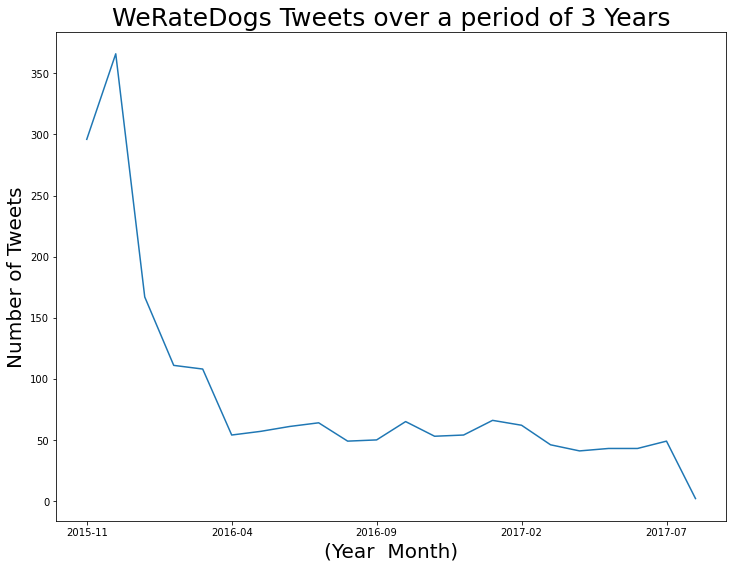

In [81]:
fig, ax = plt.subplots(figsize=(12,9))
ax = data.plot(kind='line')
ax.set_xlabel("(Year  Month)", fontsize=20)
ax.set_ylabel("Number of Tweets", fontsize=20)
ax.set_title("WeRateDogs Tweets over a period of 3 Years", fontsize=25)
plt.savefig('Tweet_trend')
plt.show()

In [82]:
data1 = df_master_copy['source'].value_counts()

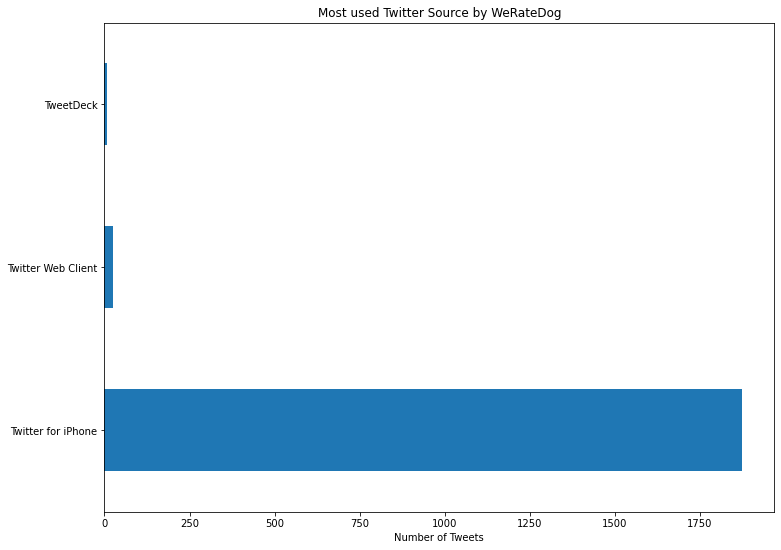

In [94]:
fig, ax = plt.subplots(figsize=(12,9))
ax = data1.plot(kind='barh')
ax.set_title('Most used Twitter Source by WeRateDog')
ax.set_xlabel('Number of Tweets')
plt.savefig('Tweet_source')
plt.show()